In [297]:
from torchvision.datasets import MNIST
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [298]:
data=MNIST(root='/Users/kirillkotrikov/Downloads/MNIST.data')

tensor(5)


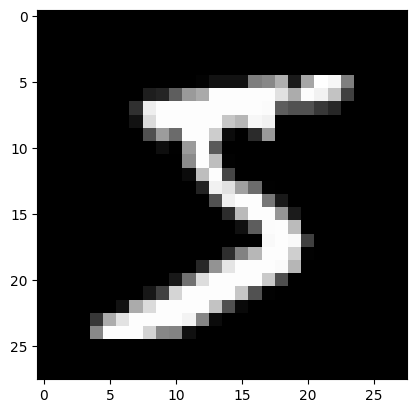

In [299]:
import matplotlib.pyplot as plt
plt.imshow(data.train_data[0], cmap='gray');
print(data.targets[0])

In [300]:
print(data.train_data.shape)
print(data.targets.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])


In [301]:
x=data.train_data.reshape(-1,784)

print(x.shape)

y=data.targets

print(y.shape)

torch.Size([60000, 784])
torch.Size([60000])


In [302]:
for i in np.unique(y):

    print(i,x[y==i].shape[0])

0 5923
1 6742
2 5958
3 6131
4 5842
5 5421
6 5918
7 6265
8 5851
9 5949


In [303]:
ssc=StandardScaler()
x_std=ssc.fit_transform(x)

In [305]:
x_std=np.array(x_std)

In [306]:
x_std[x_std==0]=0.00001

In [307]:
# compute mean vectors
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
np.set_printoptions(precision=4)

mean_vectors=[]

for i in np.unique(y):

    mean_vectors.append(np.mean(x_std[y==i], axis=0))

In [308]:
cov_dict={}

for i in np.unique(y):

    N_i = (x_std[y==i].shape)[0]-1

    mean_err=x_std[y==i]-mean_vectors[i-1]

    cov_dict.update({ 'S_'+str(i): ((mean_err).T).dot(mean_err) / N_i })

# Within-class scater matrix

S_W = sum(list(cov_dict.values()))

# Between-class scatter matrix

gen_mean=np.mean(x_std,axis=0)

S_B=x_std.shape[0] * np.dot((mean_vectors-gen_mean).T,mean_vectors-gen_mean)

print('Within-class scatter matrix shape:','\n',S_W.shape)

print('Between-class scatter matrix shape:','\n',S_B.shape)

Within-class scatter matrix shape: 
 (784, 784)
Between-class scatter matrix shape: 
 (784, 784)


In [309]:
eig_val, eig_vec=np.linalg.eig((S_W).dot(S_B))

eigen_pairs = [(np.abs(eig_val[i]), eig_vec[:,i])
                for i in range(len(eig_val))]

eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0], reverse=True)

for i in eigen_pairs:

    print(i[0]) # Sorted eigenvalues

13218910011.452696
4500746727.928147
4024492308.386
1071500722.9799795
769410411.9347881
539359497.5516644
202856770.5937858
130208778.88485156
59457159.39495908
4.0782119112303703e-07
4.0782119112303703e-07
3.797818243793424e-07
3.797818243793424e-07
3.765974767329478e-07
3.765974767329478e-07
3.7595870180014585e-07
3.7595870180014585e-07
3.7197429240938486e-07
3.7197429240938486e-07
3.6721368310473137e-07
3.6721368310473137e-07
3.65564305827444e-07
3.623582775691026e-07
3.623582775691026e-07
3.5878296160705987e-07
3.585237971474819e-07
3.585237971474819e-07
3.501867425505388e-07
3.501867425505388e-07
3.5012442763947544e-07
3.5012442763947544e-07
3.4354230543734615e-07
3.4354230543734615e-07
3.426953775547024e-07
3.426953775547024e-07
3.397292988734087e-07
3.397292988734087e-07
3.3914345306643643e-07
3.3914345306643643e-07
3.3822375298251293e-07
3.3822375298251293e-07
3.378406448408125e-07
3.378406448408125e-07
3.3440239138963523e-07
3.3440239138963523e-07
3.2536242795623504e-07
3.253

In [310]:
disc_power=[(i / eig_val.real.sum()) for i in sorted(eig_val.real, reverse=True)]

cum_discr = np.cumsum(disc_power)

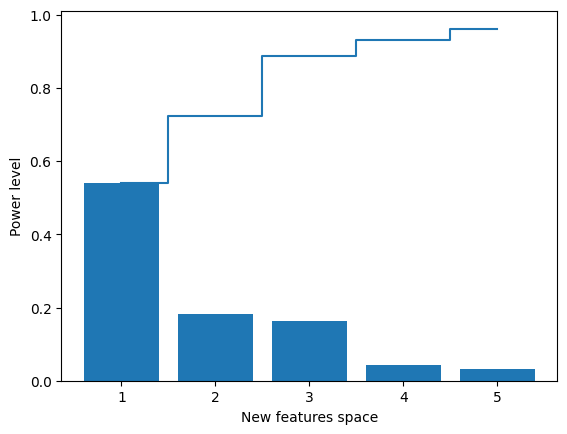

In [311]:
plt.bar(range(1,6),disc_power[:5],alpha=1)

plt.step(range(1, 6), cum_discr[:5], where='mid',)

plt.xlabel('New features space')

plt.ylabel('Power level');

In [312]:
cum_discr[:6].round(2)

array([0.54, 0.72, 0.89, 0.93, 0.96, 0.98])

In [313]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [314]:

lr=LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')

w=[]

for i in range(0,10,1):

    w.append(eigen_pairs[i][1][:,np.newaxis].real)

    w_matrix=np.concatenate(w[:i+1],axis=1)

    print(w_matrix.shape)

    x_lda=x_std.dot(w_matrix)

    x_train,x_test,y_train,y_test = train_test_split(x_lda, y, test_size=0.3, stratify=y)

    lr=lr.fit(x_train, y_train)

    y_pred=lr.predict(x_test)

    print(accuracy_score(y_test,y_pred).round(2))
    

(784, 1)
0.28
(784, 2)
0.44
(784, 3)
0.6
(784, 4)
0.67
(784, 5)
0.73
(784, 6)
0.76
(784, 7)
0.78
(784, 8)
0.79
(784, 9)
0.81
(784, 10)
0.81
